# Social Media Sentiment Analysis


In [54]:
# Import Required Libraries
import re  # Regular expression library for text processing
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical computing
import matplotlib.pyplot as plt  # Matplotlib for plotting
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns  # Seaborn for statistical data visualization
import string  # String module for string manipulation
import nltk  # NLTK (Natural Language Toolkit) for natural language processing
from wordcloud import WordCloud  # WordCloud for generating word clouds
from nltk.corpus import stopwords  # NLTK's stopwords for filtering out common words
from nltk.tokenize import TweetTokenizer  # NLTK's TweetTokenizer for tokenization of tweets
from nltk.stem import PorterStemmer  # NLTK's PorterStemmer for word stemming

In [48]:
# Reading the dataset from the provided URL and storing it in the variable 'df'
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

# Displaying the first few rows of the DataFrame to inspect the data
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [30]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [50]:
# Function to clean tweets
def clean_tweets(input_tweet):
    # Remove user handles - starting from @User
    clean_tweet = re.sub("@[\w]*", "", input_tweet)
    # Remove special characters except # as it is used in hashtags
    clean_tweet = re.sub("[^a-zA-Z#]", " ", clean_tweet)
    # Convert tweet to lowercase
    clean_tweet = clean_tweet.lower()

    # Import NLTK's stopwords, TweetTokenizer, and PorterStemmer
    stop_words = stopwords.words('english')
    Tweet_Tokenizer = TweetTokenizer()
    stemmer = PorterStemmer()

    # Tokenize the tweet
    tweet_tokens = Tweet_Tokenizer.tokenize(clean_tweet)

    # Remove stop words from tweet tokens
    tweet_tokens = [i for i in tweet_tokens if i not in stop_words]
    # Remove short words - length less than 3 such as ok, oh, etc.
    tweet_tokens = [i for i in tweet_tokens if len(i) > 3]

    # Perform stemming on tweet tokens
    tweet_tokens = [i if i.startswith("#") else stemmer.stem(i) for i in tweet_tokens]

    return " ".join(tweet_tokens)

# Applying the clean_tweets function to the 'tweet' column in the DataFrame
df['clean_tweet'] = df['tweet'].apply(lambda i : clean_tweets(i))

# Displaying the first few rows of the DataFrame after cleaning
df.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motivation


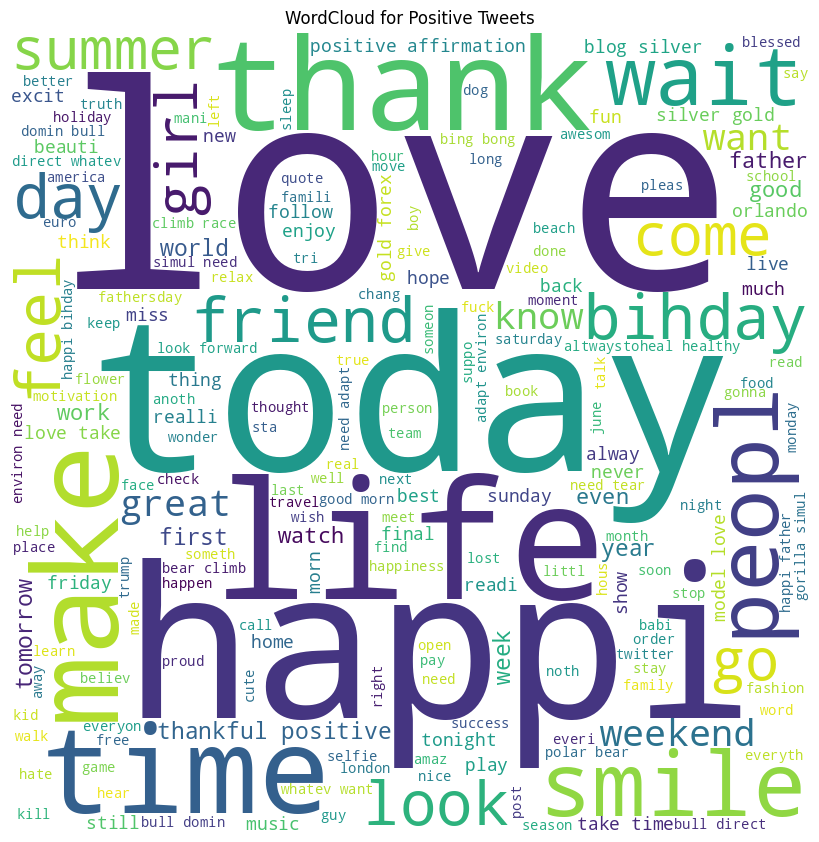

In [51]:
# Visualize Positive Sentiment in a WordCloud

# Combine all positive tweet tokens into a single string
positive_tweets_tokens = " ".join([tweet for tweet in df[df['label'] == 0]['clean_tweet']])

# Generate a WordCloud object with custom settings
positive_wordcloud = WordCloud(width=800, height=800,
                                background_color='white',
                                min_font_size=10).generate(positive_tweets_tokens.replace("#", ""))

# Display the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.tight_layout(pad=0)  # Adjust layout
plt.title("WordCloud for Positive Tweets")  # Add title
plt.show()


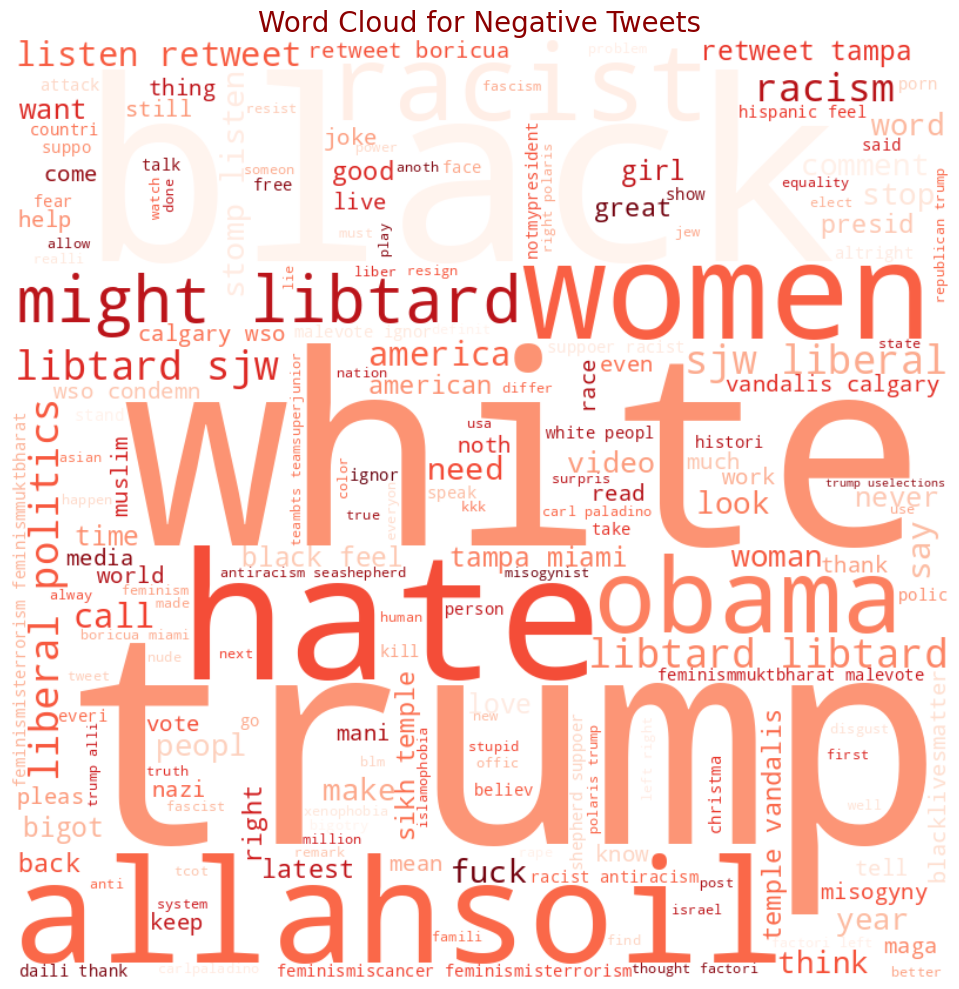

In [52]:
# Concatenate all negative tweet tokens into a single string
all_negative_tweets_tokens = " ".join([i for i in df[df['label'] == 1]['clean_tweet']])

# Generate WordCloud with customized parameters
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10,
                      colormap='Reds').generate(all_negative_tweets_tokens.replace("#", ""))

# Plot the WordCloud image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets', fontsize=20, color='darkred')
plt.axis("off")
plt.tight_layout()

# Display the WordCloud
plt.show()

<ipython-input-58-9a1071307587>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_positive_hashtags, y='Hashtags', x='Count', palette=colors)


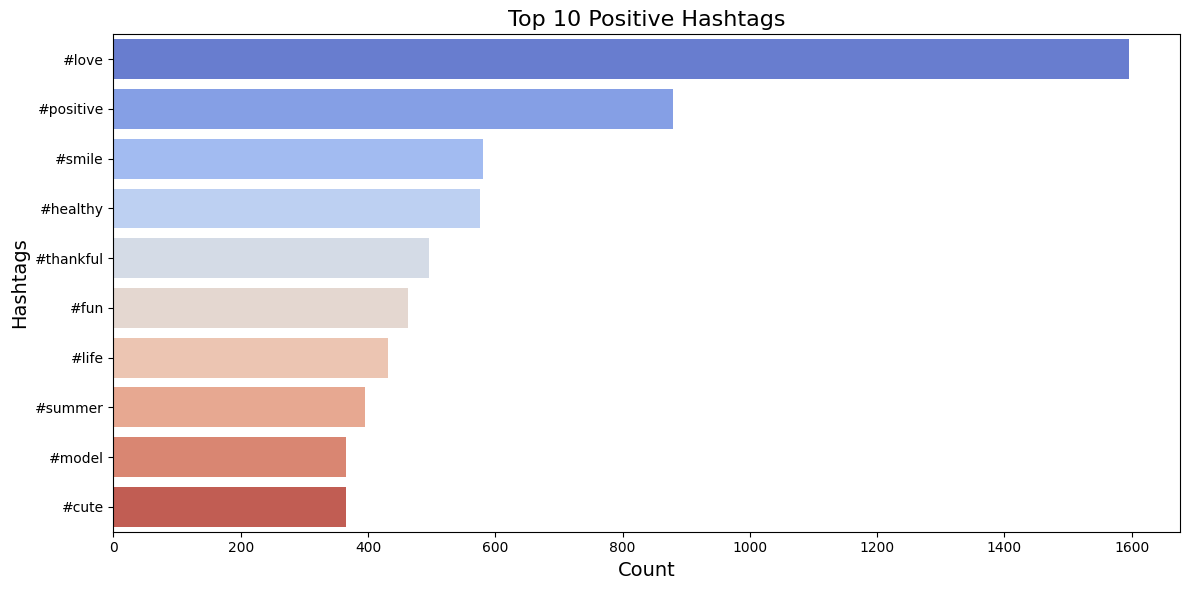

In [58]:
# Create custom gradient color palette
colors = sns.color_palette("coolwarm", len(top_positive_hashtags))

# Plot the bar chart with gradient colors
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_positive_hashtags, y='Hashtags', x='Count', palette=colors)

# Set title and labels
plt.title('Top 10 Positive Hashtags', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Hashtags', fontsize=14)

# Customize color gradient legend
gradient = [colors[i] for i in range(len(top_positive_hashtags))]
gradient = [(x[0]*255, x[1]*255, x[2]*255) for x in gradient]  # Convert RGB values to 0-255 scale
gradient = [(int(x[0]), int(x[1]), int(x[2])) for x in gradient]  # Convert RGB values to integers
gradient = ['#%02x%02x%02x' % x for x in gradient]  # Convert RGB values to hexadecimal format

# Display color gradient legend
for i, color in enumerate(gradient):
    plt.text(1, i, "", color=color, fontsize=14, ha='center', va='center')

plt.tight_layout()
plt.show()


<ipython-input-61-8457b51dc0e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=negative_hashtags_count.nlargest(10, columns="Count"), y='Hashtags', x='Count', palette=colors)


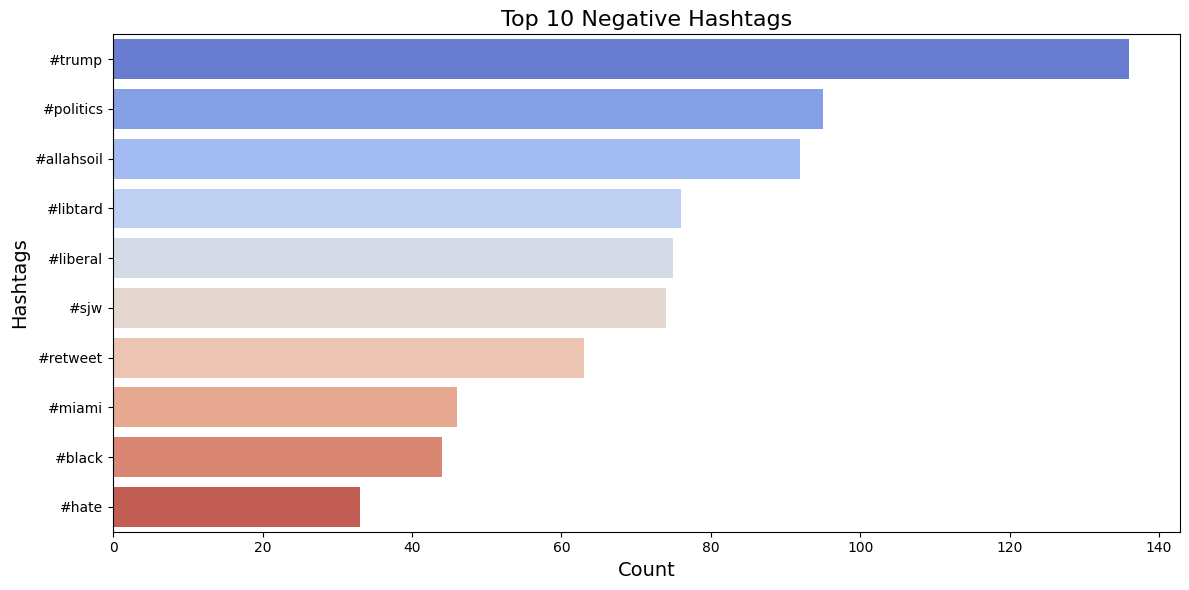

In [61]:
# Create custom gradient color palette
colors = sns.color_palette("coolwarm", len(top_negative_hashtags))

# Set the figure size and create the bar plot with gradient colors
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=negative_hashtags_count.nlargest(10, columns="Count"), y='Hashtags', x='Count', palette=colors)

# Set the title and labels
plt.title('Top 10 Negative Hashtags', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Hashtags', fontsize=14)

# Customize color gradient legend
gradient = [colors[i] for i in range(len(top_negative_hashtags))]
gradient = [(x[0]*255, x[1]*255, x[2]*255) for x in gradient]  # Convert RGB values to 0-255 scale
gradient = [(int(x[0]), int(x[1]), int(x[2])) for x in gradient]  # Convert RGB values to integers
gradient = ['#%02x%02x%02x' % x for x in gradient]  # Convert RGB values to hexadecimal format

# Display color gradient legend
for i, color in enumerate(gradient):
    plt.text(1, i, "", color=color, fontsize=14, ha='center', va='center')

plt.tight_layout()
plt.show()
